# Caso

>Taiwanese Bankruptcy Prediction Data Set - https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

>Objetivo del Proyecto : Análisis comparativo de algoritmos de clasificación, basados en lenguaje máquina, para la predicción de bancarrota, según datos financieros y gubernamentales.

## Datos del alumno



*   Alumno : Rosmery
*   E-mail : rosmeryaguilar.ram@gmail.com
*   Curso : Aprendizaje Automatico
*   Nombre Del Proyecto : Modelos de predicción de Bancarrota Financiera




## Metodología

# 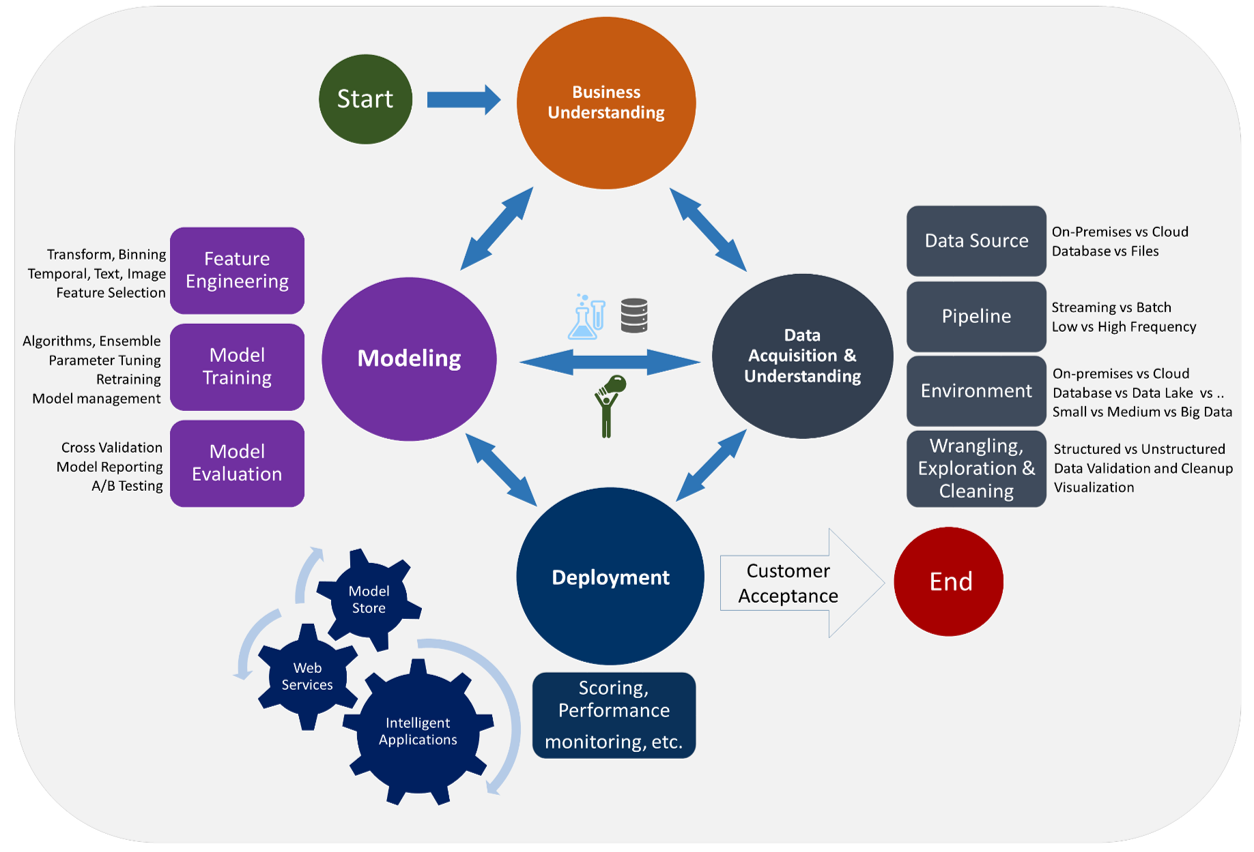

### **1. Carga de Modulos**

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import re
import warnings
warnings.filterwarnings('ignore')

### **2. Lectura Inicial de datos**

#### 2.1. Carga de datos

In [2]:
# Se carga el dataset normalizado
dataset_normalizado = pd.read_pickle(os.path.join('results','dataset_normalizado.pkl'))
dataset_normalizado.shape

(6819, 95)

In [5]:
dataset_normalizado

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X86,X87,X88,X89,X90,X91,X92,X93,X95,flag
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-2.254317,0.017106,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067,1.0
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.309033,-0.009316,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573,1.0
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.820510,0.924712,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,-0.621960,1.0
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,-1.691222,-0.158822,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,-0.471826,1.0
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.316008,-0.140392,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,-0.241715,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-0.189395,-0.291959,-0.168181,-0.206277,-0.204969,0.018215,0.017036,0.018197,-0.010092,0.016277,...,-0.194231,-0.240992,-0.024011,-0.206217,-0.002968,-0.052524,-0.030437,0.063215,-0.353693,0.0
6815,-0.494676,-0.310237,-0.477627,-0.569328,-0.568828,0.018223,0.017455,0.017919,-0.009248,0.016145,...,-0.198659,-0.196951,0.001317,-0.569333,-0.006633,-0.154404,-0.033992,0.049970,-0.185856,0.0
6816,-0.534845,-0.379194,-0.534996,0.147411,0.135029,0.017628,0.016412,0.017153,-0.009919,0.013012,...,-0.247517,-0.170987,0.019653,0.147305,-0.018166,-0.316446,-0.047870,-0.015101,1.001206,0.0
6817,0.017875,0.019594,0.007403,-0.005811,-0.004720,0.024494,0.024099,0.023223,-0.011175,0.022233,...,0.100366,-0.171066,0.003493,-0.005931,0.046934,-0.194852,-0.045898,-0.004270,-0.071364,0.0


#### 2.2. Buenas prácticas

#### 2.3. Análisis Exploratorio de Datos (EDA)

In [52]:
dataset_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6819 non-null   float64
 1   X2      6819 non-null   float64
 2   X3      6819 non-null   float64
 3   X4      6819 non-null   float64
 4   X5      6819 non-null   float64
 5   X6      6819 non-null   float64
 6   X7      6819 non-null   float64
 7   X8      6819 non-null   float64
 8   X9      6819 non-null   float64
 9   X10     6819 non-null   float64
 10  X11     6819 non-null   float64
 11  X12     6819 non-null   float64
 12  X13     6819 non-null   float64
 13  X14     6819 non-null   float64
 14  X15     6819 non-null   float64
 15  X16     6819 non-null   float64
 16  X17     6819 non-null   float64
 17  X18     6819 non-null   float64
 18  X19     6819 non-null   float64
 19  X20     6819 non-null   float64
 20  X21     6819 non-null   float64
 21  X22     6819 non-null   float64
 22  

In [54]:
#Porcentaje de filas (registros) únicas por cada columna (variable). Mientras más cercano el valor a 1 significa que tiene más filas (registros) únicos
dataset_normalizado.nunique() / len(dataset_normalizado)

X1      0.488781
X2      0.462091
X3      0.463411
X4      0.554480
X5      0.555507
          ...   
X91     1.000000
X92     0.915090
X93     0.915090
X95     1.000000
flag    0.000293
Length: 95, dtype: float64

In [55]:
dataset_normalizado.nunique()

X1      3333
X2      3151
X3      3160
X4      3781
X5      3788
        ... 
X91     6819
X92     6240
X93     6240
X95     6819
flag       2
Length: 95, dtype: int64

In [56]:
dataset_normalizado.groupby(["flag"])["flag"].count().reset_index(name="count")

,flag,count
0,0.0,6599
1,1.0,220


In [57]:
def save_figure(fig,path,name):
  fname = os.path.join(path,name)
  with PdfPages(fname) as pdf:
    pdf.savefig(fig)

In [5]:
#Graficos de valores por columna


In [6]:
#Correlacion de variables


### **3. Tratamientos o Recodificacion de variables**

#### 3.1. Completitud de los datos

#### 3.2. Recodificacion de los datos

### **4. Ingeniería y Selección de Variables**

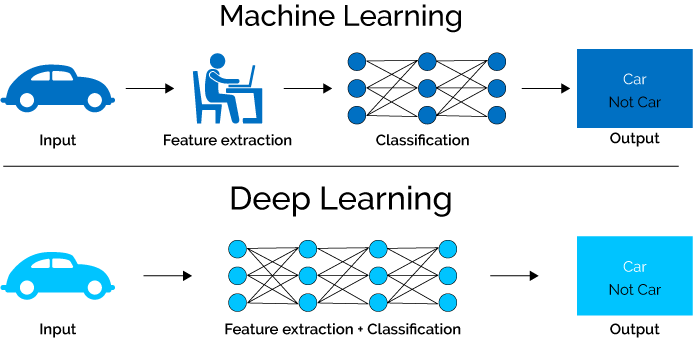

#### 4.1. Ingenieria de variables

#### 4.1. Selección de variables

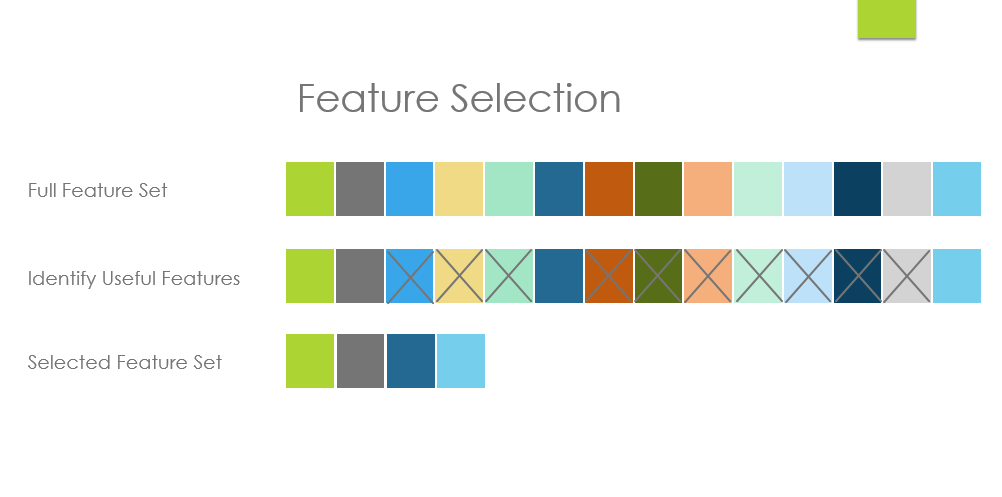

### **5. Modelamiento de Datos o Creación del Algoritmo de ML**

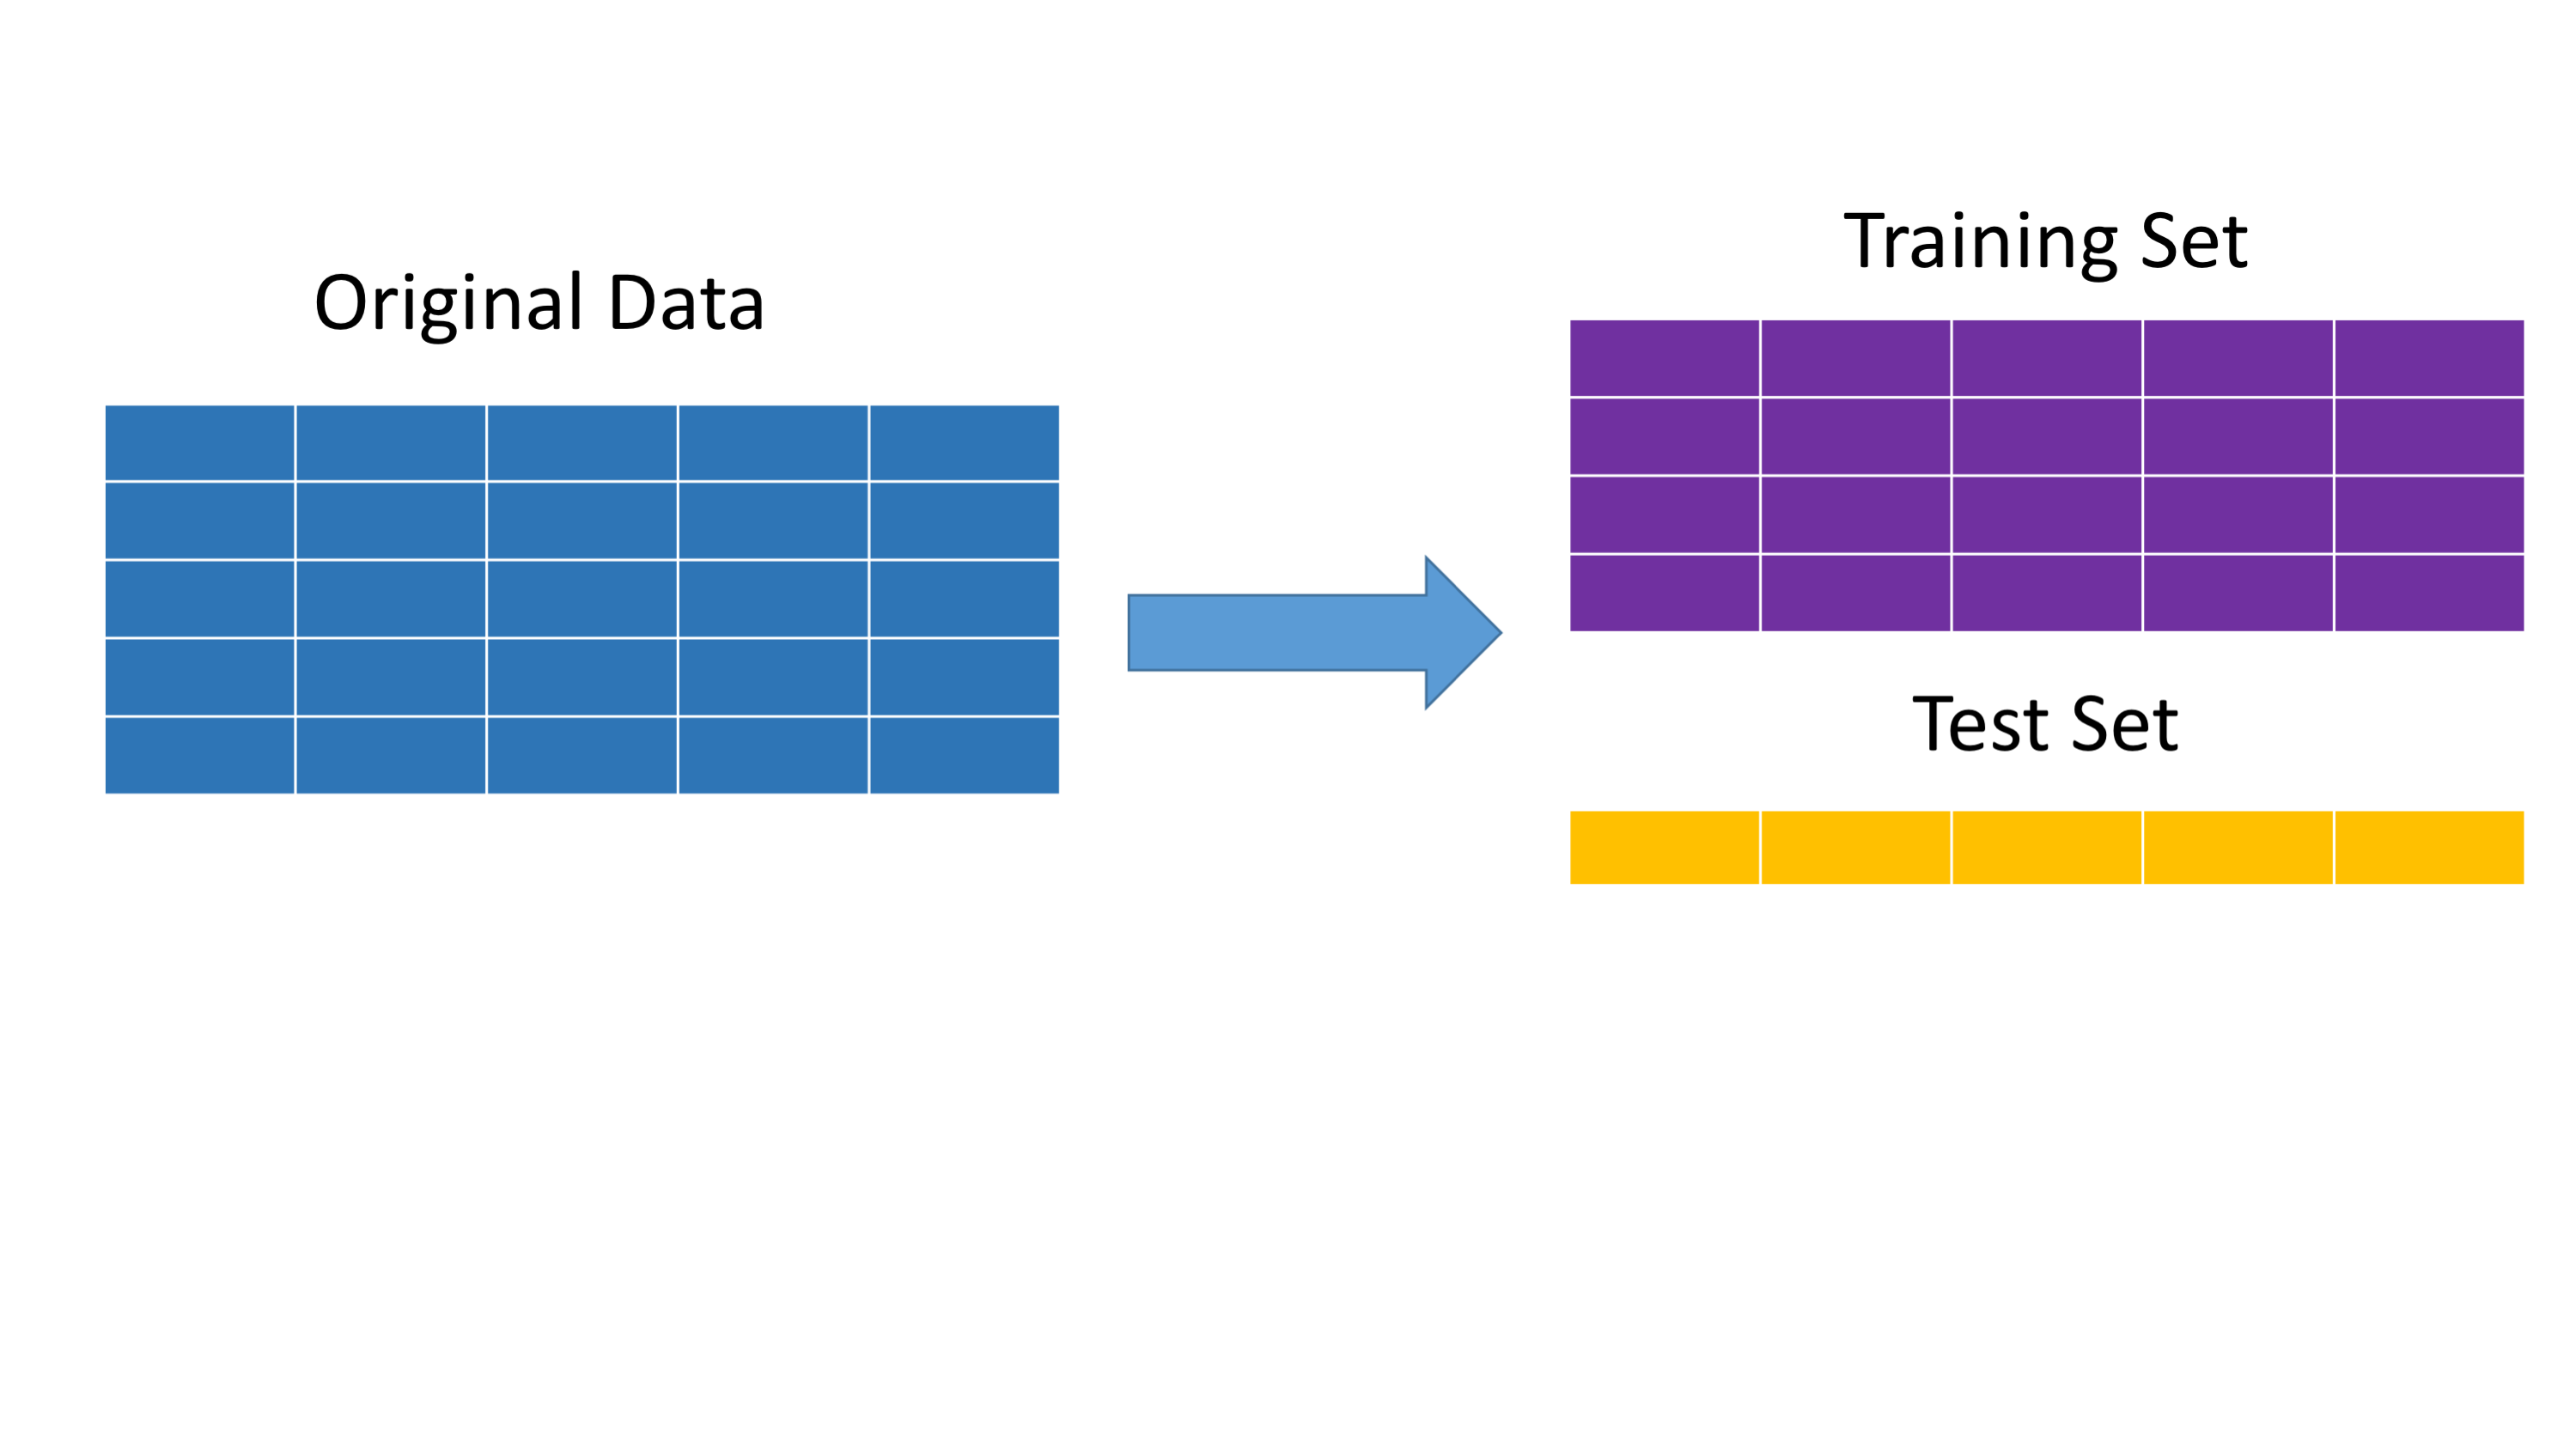

#### 5.1. Particion Muestral

In [58]:
dataset = dataset_normalizado
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar un árbol de clasificación
x = dataset.drop("flag", axis=1)

y = dataset["flag"]

In [59]:
#Mediante el método "train_test_split" usaremos el 10% de la data para probar el modelo. El parámetro "random state" nos sirve para
#poder replicar la misma separación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [60]:
print(f"Train shape: {x_train.shape}")
print(f"Test shape: {x_test.shape}")

Train shape: (5455, 94)
Test shape: (1364, 94)


#### 5.2. Algoritmos Machine Learning

In [61]:
#Entrenamiento Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train,y_train)
#array([0, 0])
clf.predict_proba(x_test)

clf.score(x_train, y_train)

0.9730522456461962

In [62]:
clf.predict_proba(x_test)

array([[9.99998205e-01, 1.79535608e-06],
       [9.90219145e-01, 9.78085488e-03],
       [9.97088038e-01, 2.91196180e-03],
       ...,
       [9.76132340e-01, 2.38676596e-02],
       [9.97741735e-01, 2.25826497e-03],
       [9.99660153e-01, 3.39846995e-04]])

In [63]:
clf.predict(x_test)


array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
y_pred = clf.predict(x_train)
predictions = y_pred
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 97.3052%


In [66]:
y_pred = clf.predict(x_test)
predictions = y_pred
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 96.6276%


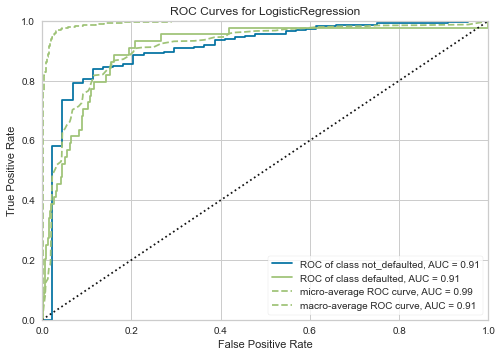

AttributeError: 'LogisticRegression' object has no attribute 'binary'

AttributeError: 'LogisticRegression' object has no attribute 'binary'

In [67]:
# Curva ROC- AUC
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(clf, x_train, y_train, X_test=x_test, y_test=y_test, classes=['not_defaulted', 'defaulted'])

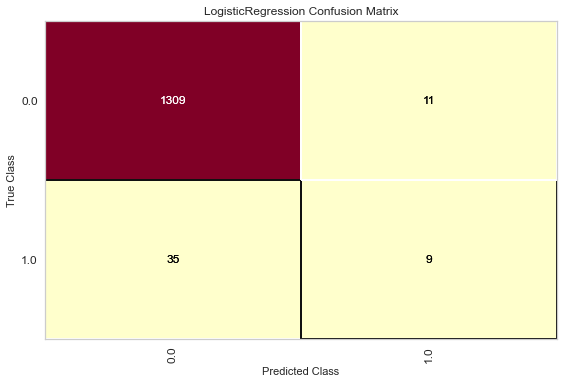

In [68]:
viz = ConfusionMatrix(clf)
viz.score(x_test, y_test)
viz.draw()
viz.finalize()


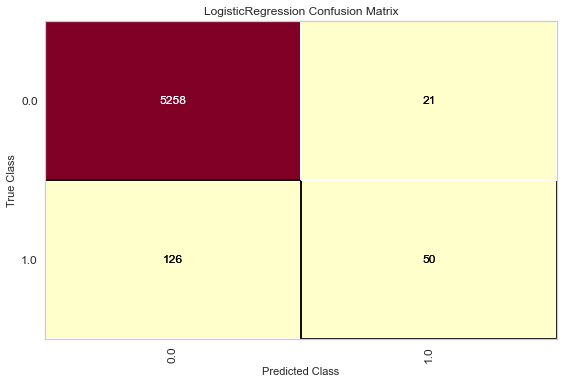

In [69]:
viz = ConfusionMatrix(clf)
viz.score(x_train, y_train)
viz.draw()
viz.finalize()

#### 5.2. Tunning de Algoritmos

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
max_depths = np.arange(2, 8, 1)
scores = []
for n in max_depths:
    clf.set_params(max_depth=n)
    clf.fit(x_train, y_train)
    scores.append(clf.score(x_test, y_test))
plt.title("Effect of max_depth")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(max_depths, scores)

ValueError: Invalid parameter max_depth for estimator LogisticRegression(random_state=0). Check the list of available parameters with `estimator.get_params().keys()`.

In [24]:
train = df_bankruptcy_pre
target = 'flag'
predictors = [x for x in train.columns if x not in [target]]


In [72]:
param_test1 = {
 'max_depth':range(1,7,1)
}
gsearch1 = GridSearchCV(estimator = LogisticRegression(), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

TypeError: __init__() got an unexpected keyword argument 'iid'